### 1. 한글 폰트 설정

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import platform

In [3]:
if platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### 2. 데이터 로드 및 확인

In [4]:
base_path = "../../data/2.processed"
file_name = "processed_final.csv"
file_path = os.path.join(base_path, file_name)

In [5]:
df = pd.read_csv(file_path)
df.head()
df.columns

Index(['시점', '행정구역(시)', '행정구역(시군구)별', '총인구수', '남자인구수', '여자인구수', '영아기', '아동기',
       '청소년기', '청년기', '중년기', '노년기', 'CCTV', '1인가구비율', '경찰서수', '강력범죄_살인계',
       '강력범죄_강도', '강력범죄_성범죄', '절도범죄_전체', '폭력범죄_전체', '지능범죄_재산범죄', '풍속범죄_전체',
       '특별경제범죄_전체', '마약범죄_전체', '보건범죄_전체', '환경범죄_전체', '교통범죄_전체', '노동범죄_전체',
       '안보범죄_전체', '선거범죄_전체', '병역범죄_전체', '기타범죄_전체'],
      dtype='object')

### 3. 가설을 위한 추가 비율 컬럼 생성

In [6]:
# 가설 4, 5번 검증을 위한 '비율' 데이터
df['노년기_비율'] = (df['노년기'] / df['총인구수']) * 100
df['여성_비율'] = (df['여자인구수'] / df['총인구수']) * 100
df['청년기_비율'] = (df['청년기'] / df['총인구수']) * 100
df['남성_비율'] = (df['남자인구수'] / df['총인구수']) * 100
df.columns

Index(['시점', '행정구역(시)', '행정구역(시군구)별', '총인구수', '남자인구수', '여자인구수', '영아기', '아동기',
       '청소년기', '청년기', '중년기', '노년기', 'CCTV', '1인가구비율', '경찰서수', '강력범죄_살인계',
       '강력범죄_강도', '강력범죄_성범죄', '절도범죄_전체', '폭력범죄_전체', '지능범죄_재산범죄', '풍속범죄_전체',
       '특별경제범죄_전체', '마약범죄_전체', '보건범죄_전체', '환경범죄_전체', '교통범죄_전체', '노동범죄_전체',
       '안보범죄_전체', '선거범죄_전체', '병역범죄_전체', '기타범죄_전체', '노년기_비율', '여성_비율', '청년기_비율',
       '남성_비율'],
      dtype='object')

### 4. EDA

In [7]:
# '서울특별시-서울특별시', '경기도-경기도' 같은 광역 단위 합계 데이터가 포함됨
# 개별 시군구에 비해 인구수나 CCTV 수가 압도적으로 많이 포함됨
# 상관관계 왜곡을 방지하기 위해 시 이름과 시군구 이름이 동일한 행 제거 후 분석 진행
print(f"제거 전 데이터 크기: {df.shape}")
df_clean = df[df['행정구역(시)'] != df['행정구역(시군구)별']].copy()
print(f"제거 후 데이터 크기: {df_clean.shape}")

제거 전 데이터 크기: (260, 36)
제거 후 데이터 크기: (243, 36)


In [8]:
# 총범죄율 컬럼 추가
crime_cols = [col for col in df_clean.columns if '범죄' in col and col != '총범죄율']
df_clean['총범죄율'] = df_clean[crime_cols].sum(axis=1)
df_clean.columns

Index(['시점', '행정구역(시)', '행정구역(시군구)별', '총인구수', '남자인구수', '여자인구수', '영아기', '아동기',
       '청소년기', '청년기', '중년기', '노년기', 'CCTV', '1인가구비율', '경찰서수', '강력범죄_살인계',
       '강력범죄_강도', '강력범죄_성범죄', '절도범죄_전체', '폭력범죄_전체', '지능범죄_재산범죄', '풍속범죄_전체',
       '특별경제범죄_전체', '마약범죄_전체', '보건범죄_전체', '환경범죄_전체', '교통범죄_전체', '노동범죄_전체',
       '안보범죄_전체', '선거범죄_전체', '병역범죄_전체', '기타범죄_전체', '노년기_비율', '여성_비율', '청년기_비율',
       '남성_비율', '총범죄율'],
      dtype='object')

In [9]:
print("더해지는 컬럼 목록:", crime_cols)

더해지는 컬럼 목록: ['강력범죄_살인계', '강력범죄_강도', '강력범죄_성범죄', '절도범죄_전체', '폭력범죄_전체', '지능범죄_재산범죄', '풍속범죄_전체', '특별경제범죄_전체', '마약범죄_전체', '보건범죄_전체', '환경범죄_전체', '교통범죄_전체', '노동범죄_전체', '안보범죄_전체', '선거범죄_전체', '병역범죄_전체', '기타범죄_전체']


C:\Users\jinhy\AppData\Local\Temp\ipykernel_24932\3336606506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='행정구역(시)', y='총범죄율', data=df_clean, order=sorted_order, palette='Set3')


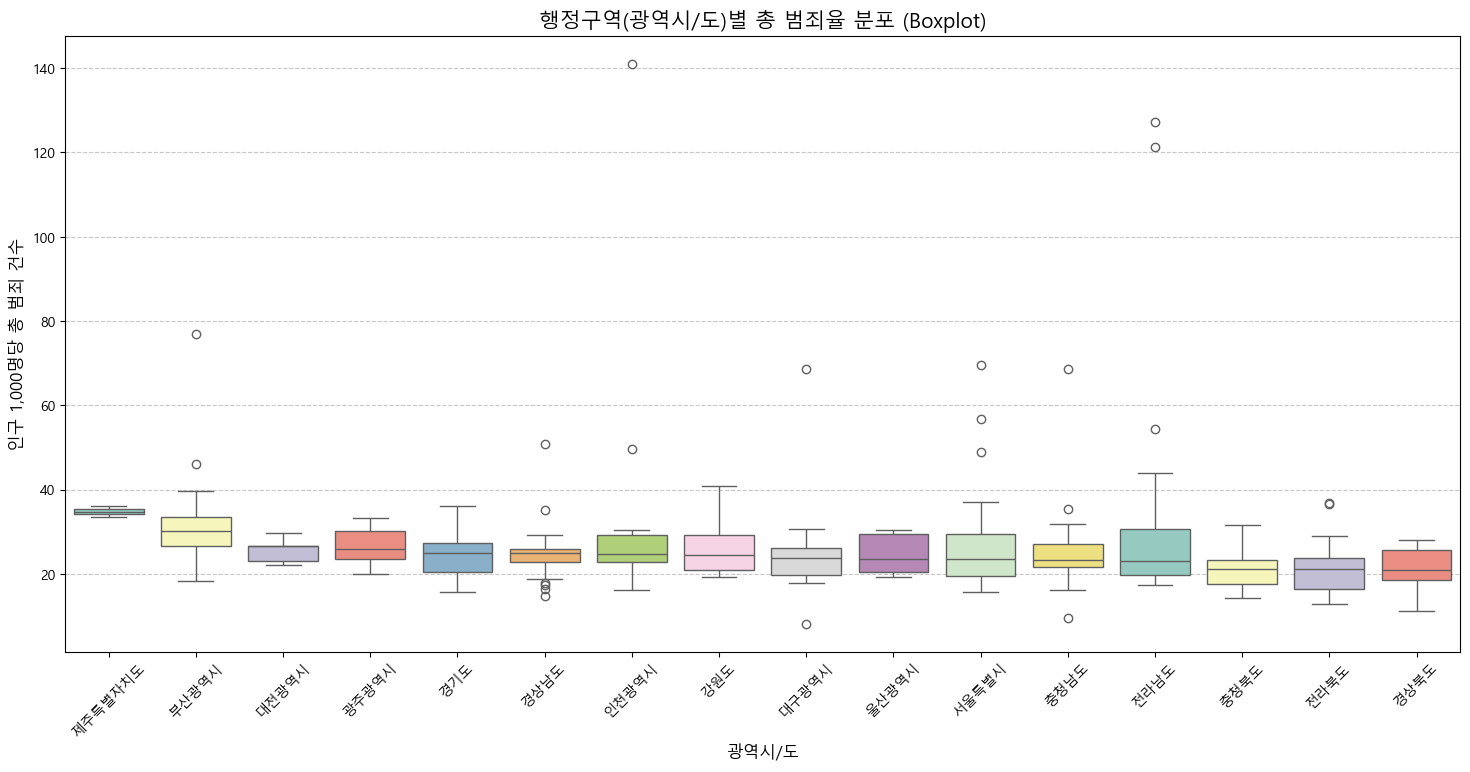

In [10]:
plt.figure(figsize=(18, 8))

# 범죄율 중앙값이 높은 순서대로 광역시도를 정렬 
sorted_order = df_clean.groupby('행정구역(시)')['총범죄율'].median().sort_values(ascending=False).index

sns.boxplot(x='행정구역(시)', y='총범죄율', data=df_clean, order=sorted_order, palette='Set3')

plt.title('행정구역(광역시/도)별 총 범죄율 분포 (Boxplot)', fontsize=15)
plt.xlabel('광역시/도', fontsize=12)
plt.ylabel('인구 1,000명당 총 범죄 건수', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

> 거주민은 적은데, 실제 섬에 있는 사람은 많아서" 수치상 범죄율이 뻥튀기되어 보이는 전형적인 **'관광지 착시 현상'**일 수 있음

> 인천과 전남에서 알 수 있듯이 이상치가 발견됨. 이에 따라 이후 테스트에서 이상치에 강건한 비모수적 방법들을 함께 사용할 예정

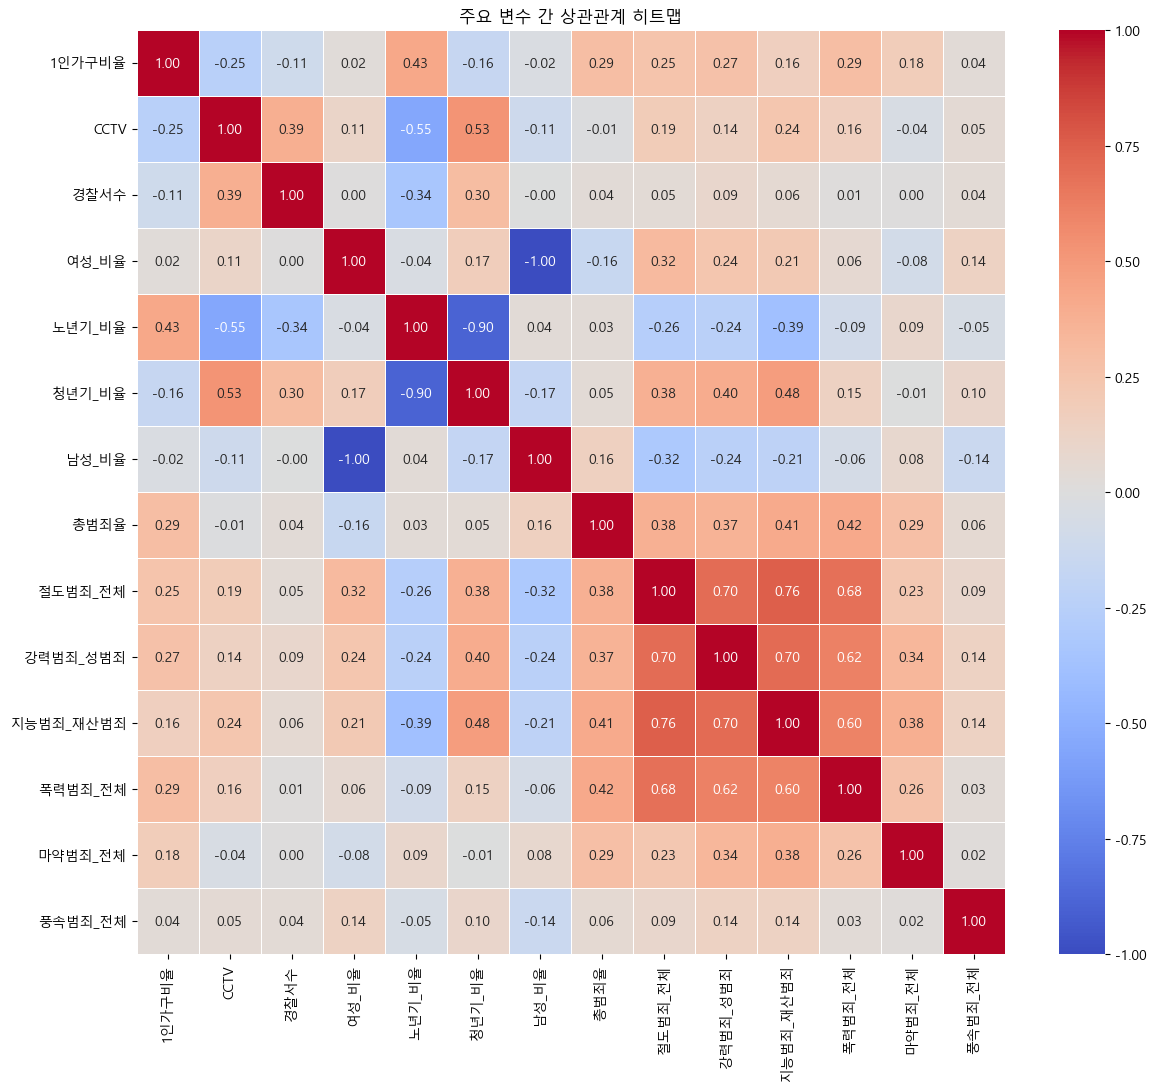

In [12]:
# 상관관계를 보고 싶은 주요 변수들
target_cols = [
    # --- 원인 변수 (X) ---
    '1인가구비율', 'CCTV', '경찰서수', 
    '여성_비율', '노년기_비율', 
    '청년기_비율', '남성_비율',   # [NEW] 추가된 X
    
    # --- 결과 변수 (Y) ---
    '총범죄율', 
    '절도범죄_전체',       # 가설 1
    '강력범죄_성범죄',     # 가설 4
    '지능범죄_재산범죄',   # 가설 5
    '폭력범죄_전체',       # [NEW] 가설 6, 7
    '마약범죄_전체',       # [NEW] 가설 8
    '풍속범죄_전체'        # [NEW] 가설 9
]

# 상관계수 행렬 계산
corr_matrix = df_clean[target_cols].corr()

# 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, 
            annot=True,      # 숫자 표시
            fmt='.2f',       # 소수점 둘째자리까지
            cmap='coolwarm', # 파랑(음의상관) ~ 빨강(양의상관)
            vmin=-1, vmax=1, # -1 ~ 1 사이로 고정
            linewidths=0.5)
plt.title('주요 변수 간 상관관계 히트맵')
plt.show()

> '청년기'랑 '절도, 성범죄, 재산범죄'가 상관성을 보임

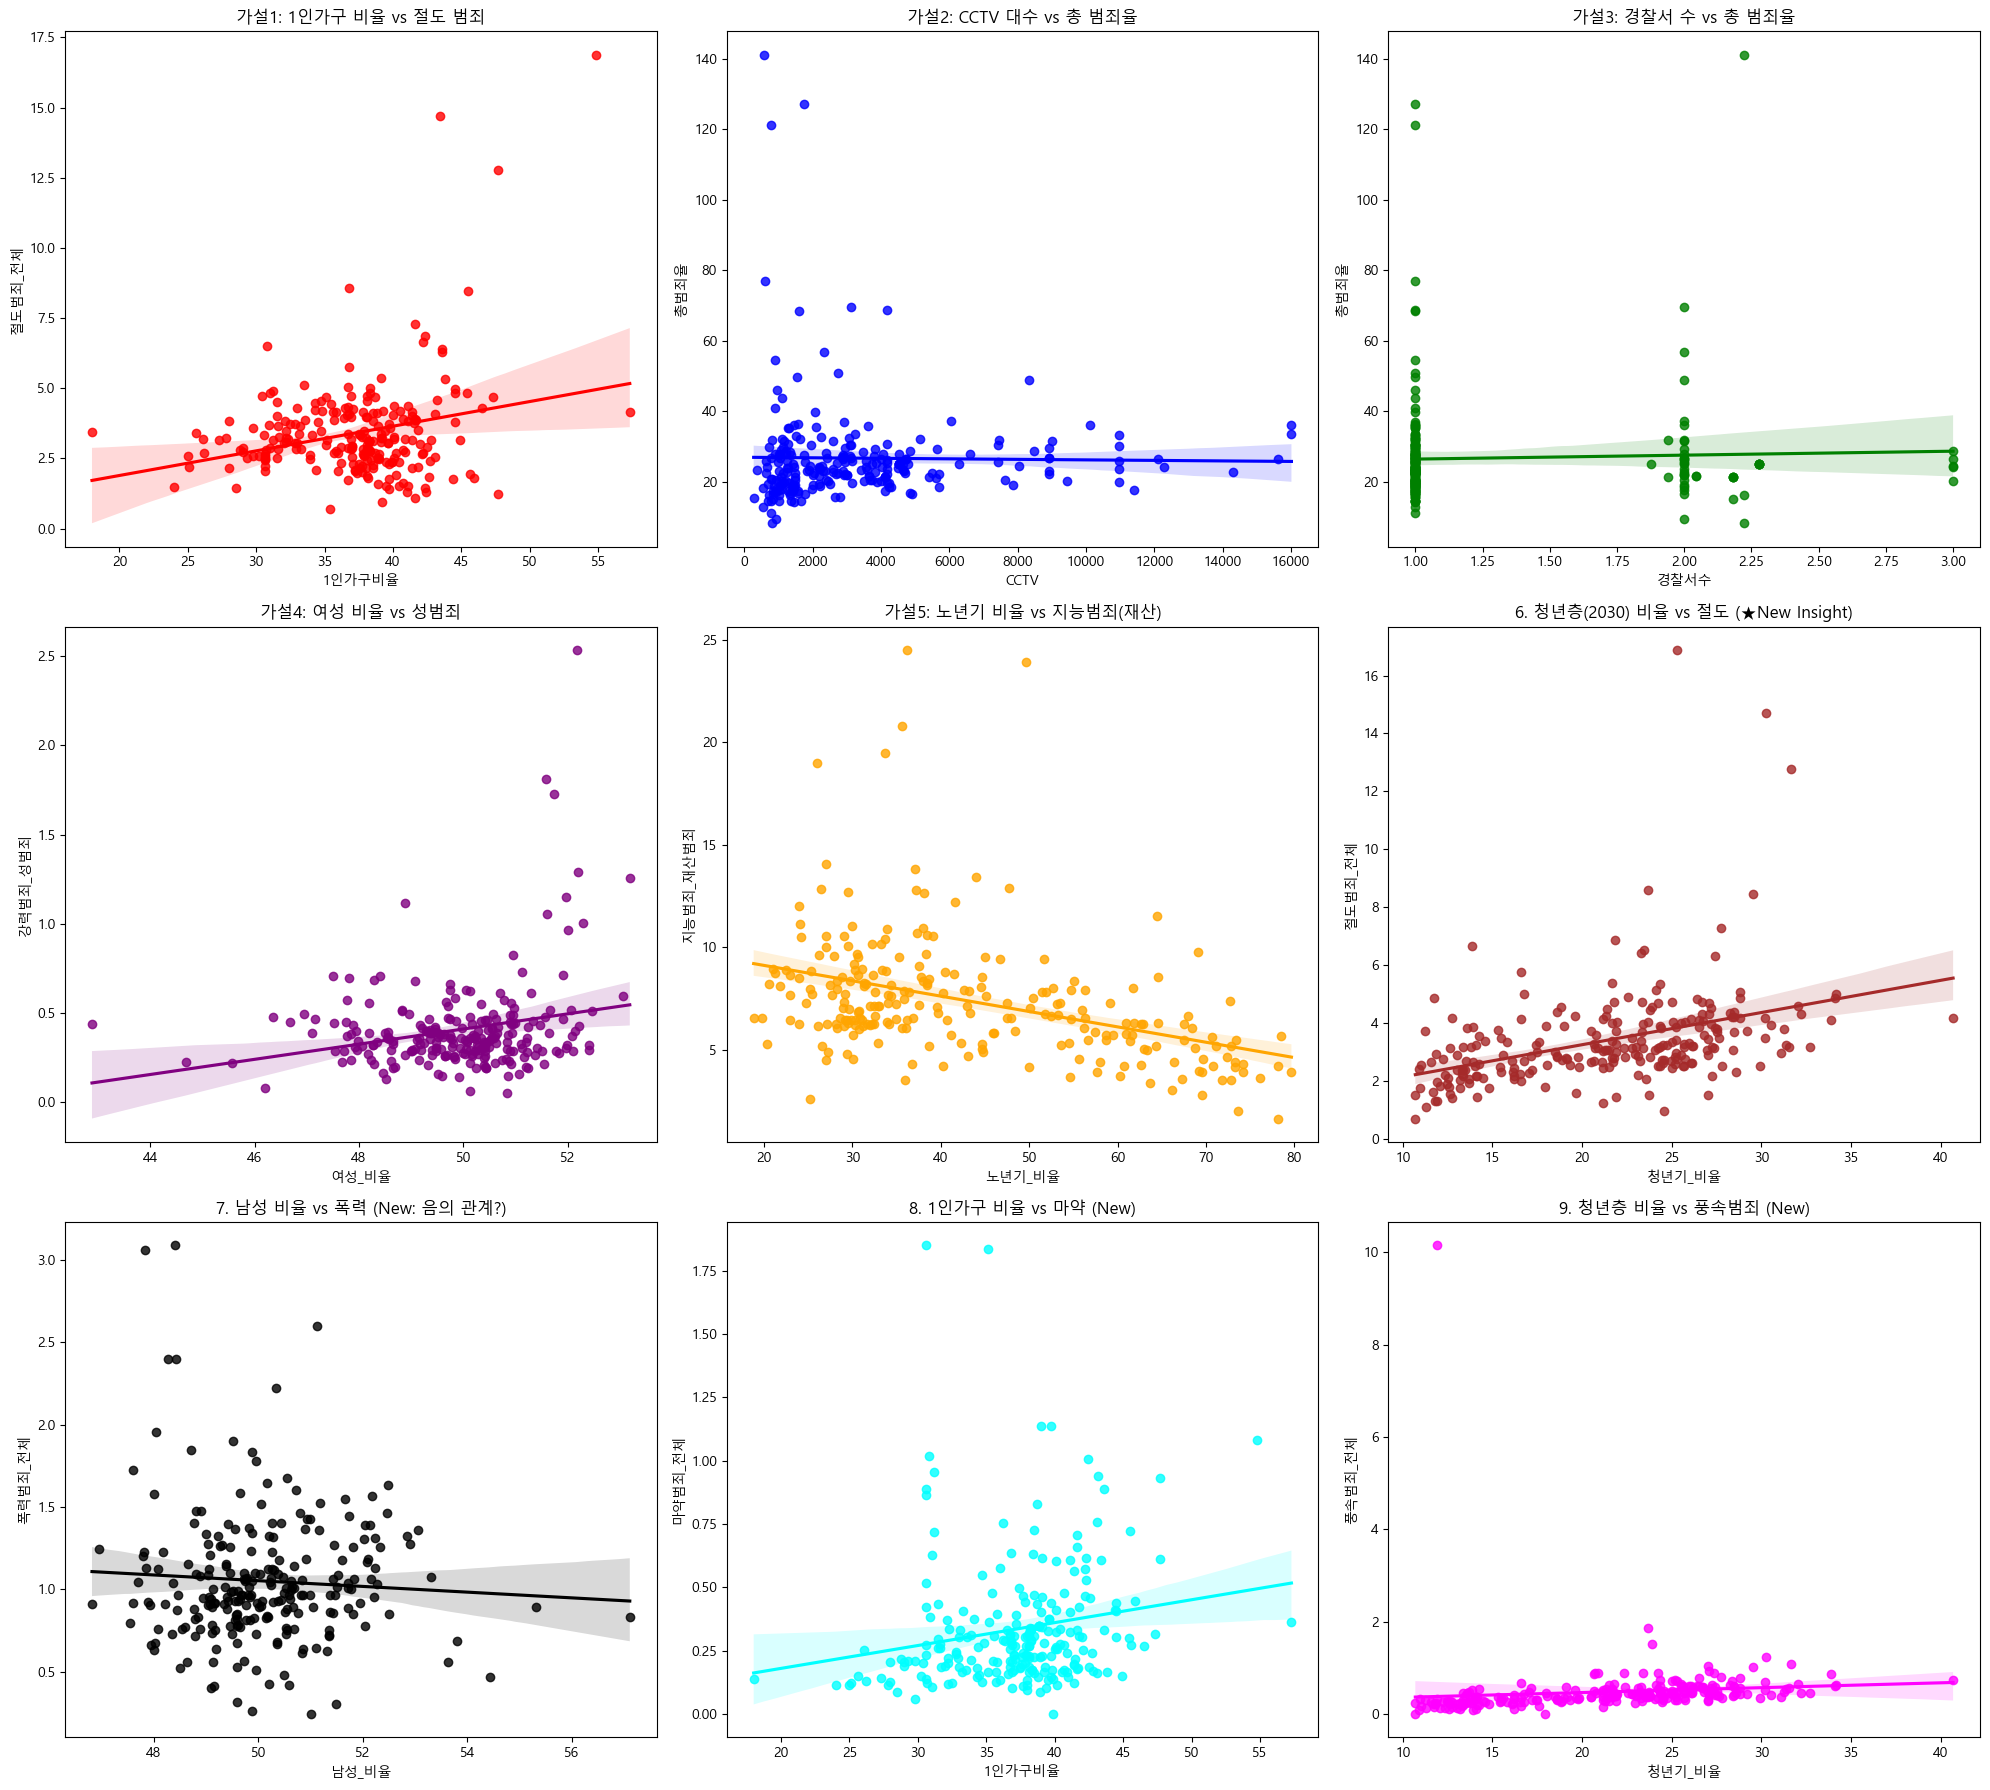

In [13]:
# 그래프를 3행 2열로 배치 
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten() # 2차원 배열을 1차원으로 펴서 쓰기 편하게 만듦

# --- 가설 1: 1인가구 vs 절도 ---
sns.regplot(x='1인가구비율', y='절도범죄_전체', data=df_clean, ax=axes[0], color='red')
axes[0].set_title('가설1: 1인가구 비율 vs 절도 범죄')

# --- 가설 2: CCTV vs 총범죄율 ---
sns.regplot(x='CCTV', y='총범죄율', data=df_clean, ax=axes[1], color='blue')
axes[1].set_title('가설2: CCTV 대수 vs 총 범죄율')

# --- 가설 3: 경찰서수 vs 총범죄율 ---
sns.regplot(x='경찰서수', y='총범죄율', data=df_clean, ax=axes[2], color='green')
axes[2].set_title('가설3: 경찰서 수 vs 총 범죄율')

# --- 가설 4: 여성비율 vs 성범죄 ---
sns.regplot(x='여성_비율', y='강력범죄_성범죄', data=df_clean, ax=axes[3], color='purple')
axes[3].set_title('가설4: 여성 비율 vs 성범죄')

# --- 가설 5: 노년기비율 vs 지능범죄 ---
sns.regplot(x='노년기_비율', y='지능범죄_재산범죄', data=df_clean, ax=axes[4], color='orange')
axes[4].set_title('가설5: 노년기 비율 vs 지능범죄(재산)')

# 가설 6 (New): 청년기 vs 절도 (★ 발견: 폭력보다 절도와 더 강한 상관관계)
sns.regplot(x='청년기_비율', y='절도범죄_전체', data=df_clean, ax=axes[5], color='brown')
axes[5].set_title('6. 청년층(2030) 비율 vs 절도 (★New Insight)')

# 가설 7 (New): 남성비율 vs 폭력 (반전: 남자가 많다고 무조건 싸우진 않음)
sns.regplot(x='남성_비율', y='폭력범죄_전체', data=df_clean, ax=axes[6], color='black')
axes[6].set_title('7. 남성 비율 vs 폭력 (New: 음의 관계?)')

# 가설 8 (New): 1인가구 vs 마약 (은밀한 범죄의 온상?)
sns.regplot(x='1인가구비율', y='마약범죄_전체', data=df_clean, ax=axes[7], color='cyan')
axes[7].set_title('8. 1인가구 비율 vs 마약 (New)')

# 가설 9 (New): 청년기 vs 풍속 (유흥/도박 관련성)
sns.regplot(x='청년기_비율', y='풍속범죄_전체', data=df_clean, ax=axes[8], color='magenta')
axes[8].set_title('9. 청년층 비율 vs 풍속범죄 (New)')

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [18]:
# 피어슨 상관계수는 데이터의 정규성을 가정
# 데이터가 정규분포를 따르지 않을 경우, 비모수적 방법인 '스피어만(Spearman)' 사용

from scipy.stats import shapiro

print("========== 정규성 검정 및 상관계수 선택 ==========")
print(f"{'변수명':<20} | {'P-value':<10} | {'정규성 여부'}")
print("-" * 55)

# 검증할 모든 변수 리스트
check_cols = [
    # 원인 변수
    '1인가구비율', 'CCTV', '경찰서수', 
    '여성_비율', '노년기_비율', 
    '청년기_비율', '남성_비율',   
    
    # 결과 변수
    '총범죄율', 
    '절도범죄_전체', '강력범죄_성범죄', '지능범죄_재산범죄',
    '폭력범죄_전체', '마약범죄_전체', '풍속범죄_전체'  
]

# 샤피로-윌크 검정 (Shapiro-Wilk Test)
# 귀무가설: 데이터가 정규분포를 따른다.
# P-value < 0.05 이면 귀무가설 기각 -> 정규성 아님 -> 스피어만 사용 권장
is_normal = True 
for col in check_cols:
    stat, p_val = shapiro(df_clean[col])
    result = "정규분포 O" if p_val > 0.05 else "정규분포 X (기각)"
    print(f"{col:<20} | {p_val:.4f}     | {result}")
    
    if p_val < 0.05:
        is_normal = False

========== 정규성 검정 및 상관계수 선택 ==========
변수명                  | P-value    | 정규성 여부
-------------------------------------------------------
1인가구비율               | 0.0001     | 정규분포 X (기각)
CCTV                 | 0.0000     | 정규분포 X (기각)
경찰서수                 | 0.0000     | 정규분포 X (기각)
여성_비율                | 0.0000     | 정규분포 X (기각)
노년기_비율               | 0.0000     | 정규분포 X (기각)
청년기_비율               | 0.0000     | 정규분포 X (기각)
남성_비율                | 0.0000     | 정규분포 X (기각)
총범죄율                 | 0.0000     | 정규분포 X (기각)
절도범죄_전체              | 0.0000     | 정규분포 X (기각)
강력범죄_성범죄             | 0.0000     | 정규분포 X (기각)
지능범죄_재산범죄            | 0.0000     | 정규분포 X (기각)
폭력범죄_전체              | 0.0000     | 정규분포 X (기각)
마약범죄_전체              | 0.0000     | 정규분포 X (기각)
풍속범죄_전체              | 0.0000     | 정규분포 X (기각)


In [15]:
# 통계적 가설 검정 (Pearson Correlation & P-value)

hypothesis_list = [
    ('1인가구비율', '절도범죄_전체', '가설1(1인가구-절도)'),
    ('CCTV', '총범죄율', '가설2(CCTV-총범죄)'),
    ('경찰서수', '총범죄율', '가설3(경찰서-총범죄)'),
    ('여성_비율', '강력범죄_성범죄', '가설4(여성비-성범죄)'),
    ('노년기_비율', '지능범죄_재산범죄', '가설5(노인비-지능범죄)'),
    
    ('청년기_비율', '절도범죄_전체', '가설6(청년-절도)'),    # 1인가구보다 더 높게 나올지 확인
    ('남성_비율', '폭력범죄_전체', '가설7(남성-폭력)'),    # 반전(음의 관계) 확인용
    ('1인가구비율', '마약범죄_전체', '가설8(1인가구-마약)'), # 사회적 이슈 반영
    ('청년기_비율', '풍속범죄_전체', '가설9(청년-풍속)')     # 유흥가 특성 확인
]

print("========== 가설 검정 결과 ==========")
print(f"{'가설 이름':<20} | {'상관계수(r)':<12} | {'P-value':<10} | {'결과'}")
print("-" * 65)

for x_col, y_col, title in hypothesis_list:
# 스피어만 상관계수 계산
    corr, p_val = stats.spearmanr(df_clean[x_col], df_clean[y_col])
    
    # 결과 판정 (유의수준 0.05 기준)
    result = "채택(유의미)" if p_val < 0.05 else "기각(무관함)"
    
    # 상관계수(rho)가 양수면 비례, 음수면 반비례
    direction = "양(+)" if corr > 0 else "음(-)"
    if result == "기각(무관함)": direction = "없음"

    print(f"{title:<20} | {corr:.4f} ({direction}) | {p_val:.4f}     | {result}")

========== 가설 검정 결과 ==========
가설 이름                | 상관계수(r)      | P-value    | 결과
-----------------------------------------------------------------
가설1(1인가구-절도)         | 0.0466 (없음) | 0.4701     | 기각(무관함)
가설2(CCTV-총범죄)        | 0.1829 (양(+)) | 0.0042     | 채택(유의미)
가설3(경찰서-총범죄)         | 0.0113 (없음) | 0.8604     | 기각(무관함)
가설4(여성비-성범죄)         | 0.1142 (없음) | 0.0755     | 기각(무관함)
가설5(노인비-지능범죄)        | -0.4590 (음(-)) | 0.0000     | 채택(유의미)
가설6(청년-절도)           | 0.4987 (양(+)) | 0.0000     | 채택(유의미)
가설7(남성-폭력)           | 0.0566 (없음) | 0.3796     | 기각(무관함)
가설8(1인가구-마약)         | 0.2679 (양(+)) | 0.0000     | 채택(유의미)
가설9(청년-풍속)           | 0.6499 (양(+)) | 0.0000     | 채택(유의미)


> (1)1인 가구와 절도는 무관했지만, (6)청년과 절도는 유관한 것으로 확인

> 성별과 인프라(CCTV, 경찰서)는 범죄를 설명하지 못하고 있음

> 청년-절도, 청년-풍속, 노인-지능, 1인가구-마약 에 대한 검증을 이어서 할 것

### 5. 그룹간 차이(T-Test, M-W Test)

In [17]:
from scipy.stats import ttest_ind, mannwhitneyu, levene

def compare_groups(df, group_col, target_col, top_n=0.3):
    # 1. 기준값 설정 (상위 30%, 하위 30%)
    high_cut = df[group_col].quantile(1 - top_n)
    low_cut = df[group_col].quantile(top_n)
    
    # 2. 그룹 나누기
    group_high = df[df[group_col] >= high_cut][target_col]
    group_low = df[df[group_col] <= low_cut][target_col]
    
    print(f"[집단 비교] {group_col} (상위 vs 하위 {int(top_n*100)}%) -> {target_col}")
    
    # 3. 등분산 검정 (Levene)
    lev_stat, lev_p = levene(group_high, group_low)
    equal_var = True if lev_p > 0.05 else False
    
    # 4. T-Test (Welch's Option 적용)
    t_stat, t_p = ttest_ind(group_high, group_low, equal_var=equal_var)
    
    # 5. Mann-Whitney U Test (비모수 검정)
    u_stat, u_p = mannwhitneyu(group_high, group_low, alternative='two-sided')
    
    # 6. 결과 출력
    print(f"   - [T-Test] P-value: {t_p:.6e} ({'유의미' if t_p < 0.05 else '기각'})")
    print(f"   - [M-W Test] P-value: {u_p:.6e} ({'유의미' if u_p < 0.05 else '기각'})")
    
    if u_p < 0.05:
        # 격차 계산 (중위수 기준)
        diff = group_high.median() - group_low.median()
        direction = "높음(↑)" if diff > 0 else "낮음(↓)"
        print(f"결론: 상위 지역이 하위 지역보다 범죄율이 {abs(diff):.2f}만큼 {direction}")
    else:
        print(f"결론: 두 그룹 간 통계적으로 유의미한 차이가 없음.")
    print("-" * 60)
    

# 실행
# 1. 청년층과 절도 (상관관계 0.50)
compare_groups(df_clean, '청년기_비율', '절도범죄_전체')

# 2. 청년층과 풍속 (상관관계 0.65 - 가장 강력!)
compare_groups(df_clean, '청년기_비율', '풍속범죄_전체')

# 3. 노년층과 지능범죄 (상관관계 -0.46)
compare_groups(df_clean, '노년기_비율', '지능범죄_재산범죄')

# 4. 1인가구와 마약 (상관관계 0.27 - 확인 사살 필요)
compare_groups(df_clean, '1인가구비율', '마약범죄_전체')

[집단 비교] 청년기_비율 (상위 vs 하위 30%) -> 절도범죄_전체
   - [T-Test] P-value: 8.709427e-07 (유의미)
   - [M-W Test] P-value: 6.468783e-12 (유의미)
결론: 상위 지역이 하위 지역보다 범죄율이 1.43만큼 높음(↑)
------------------------------------------------------------
[집단 비교] 청년기_비율 (상위 vs 하위 30%) -> 풍속범죄_전체
   - [T-Test] P-value: 2.522491e-01 (기각)
   - [M-W Test] P-value: 5.919078e-18 (유의미)
결론: 상위 지역이 하위 지역보다 범죄율이 0.30만큼 높음(↑)
------------------------------------------------------------
[집단 비교] 노년기_비율 (상위 vs 하위 30%) -> 지능범죄_재산범죄
   - [T-Test] P-value: 3.865361e-11 (유의미)
   - [M-W Test] P-value: 9.742596e-12 (유의미)
결론: 상위 지역이 하위 지역보다 범죄율이 2.27만큼 낮음(↓)
------------------------------------------------------------
[집단 비교] 1인가구비율 (상위 vs 하위 30%) -> 마약범죄_전체
   - [T-Test] P-value: 1.685895e-01 (기각)
   - [M-W Test] P-value: 2.419182e-03 (유의미)
결론: 상위 지역이 하위 지역보다 범죄율이 0.10만큼 높음(↑)
------------------------------------------------------------


> 그룹간 차이를 보기 위해 T-Test 수행

> '청년기-풍속', '1인가구-마약'의 경우 이상치로 인해 T-Test가 불안정할 수 있음

> 비모수 검정을 통한 그룹간 비교(M-W U Test) 수행

### 6. 데이터 저장

In [20]:
save_dir = "../../data/2.processed"
file_name = "processed_for_analysis.csv" 
save_path = os.path.join(save_dir, file_name)
df_clean.to_csv(save_path, index=False, encoding='utf-8-sig')

In [22]:
output_dir = "../../data/3.output"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 지역별 범죄율 Boxplot 저장
plt.figure(figsize=(18, 8))
sorted_order = df_clean.groupby('행정구역(시)')['총범죄율'].median().sort_values(ascending=False).index
sns.boxplot(x='행정구역(시)', y='총범죄율', data=df_clean, order=sorted_order, palette='Set3')
plt.title('행정구역(광역시/도)별 총 범죄율 분포', fontsize=15)
plt.xlabel('광역시/도', fontsize=12)
plt.ylabel('인구 1,000명당 총 범죄 건수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 파일로 저장
save_path = os.path.join(output_dir, "1_boxplot_region_crime.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight') # dpi=300: 고화질
plt.close() # 메모리 확보를 위해 닫기
print(f"✅ 저장 완료: {save_path}")


# [Figure 2] 상관관계 Heatmap 저장 (Spearman)
# 상관관계 다시 계산 
target_cols = [
    '1인가구비율', 'CCTV', '경찰서수', '여성_비율', '노년기_비율', '청년기_비율', '남성_비율',
    '총범죄율', '절도범죄_전체', '강력범죄_성범죄', '지능범죄_재산범죄', 
    '폭력범죄_전체', '마약범죄_전체', '풍속범죄_전체'
]
corr_matrix = df_clean[target_cols].corr(method='spearman') # 스피어만 명시

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('주요 변수 간 상관관계 히트맵 (Spearman)', fontsize=15)

# 파일로 저장
save_path = os.path.join(output_dir, "2_heatmap_correlation.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ 저장 완료: {save_path}")


# 가설 검증 Scatter Plot (3x3) 저장
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

# 그릴 가설 목록 (X, Y, 제목)
plot_list = [
    ('1인가구비율', '절도범죄_전체', '1. 1인가구 vs 절도'),
    ('CCTV', '총범죄율', '2. CCTV vs 총범죄율'),
    ('경찰서수', '총범죄율', '3. 경찰서수 vs 총범죄율'),
    ('여성_비율', '강력범죄_성범죄', '4. 여성비율 vs 성범죄'),
    ('노년기_비율', '지능범죄_재산범죄', '5. 노년기비율 vs 지능범죄'),
    ('청년기_비율', '절도범죄_전체', '6. 청년층 vs 절도 (★New)'),
    ('남성_비율', '폭력범죄_전체', '7. 남성비율 vs 폭력 (New)'),
    ('1인가구비율', '마약범죄_전체', '8. 1인가구 vs 마약 (New)'),
    ('청년기_비율', '풍속범죄_전체', '9. 청년층 vs 풍속 (New)')
]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'black', 'cyan', 'magenta']

for i, (x, y, title) in enumerate(plot_list):
    sns.regplot(x=x, y=y, data=df_clean, ax=axes[i], color=colors[i], scatter_kws={'alpha':0.5})
    axes[i].set_title(title, fontsize=12)

plt.tight_layout()

# 파일로 저장
save_path = os.path.join(output_dir, "3_scatter_hypotheses.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ 저장 완료: {save_path}")

C:\Users\jinhy\AppData\Local\Temp\ipykernel_24932\1870460329.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='행정구역(시)', y='총범죄율', data=df_clean, order=sorted_order, palette='Set3')


✅ 저장 완료: ../../data/3.output\1_boxplot_region_crime.png
✅ 저장 완료: ../../data/3.output\2_heatmap_correlation.png
✅ 저장 완료: ../../data/3.output\3_scatter_hypotheses.png
